## Road Speed Limits by Countries

We use the data from wikipedia article: 

https://en.wikipedia.org/wiki/Speed_limits_by_country

In [1]:
import re

In [2]:
import pandas as pd

In [3]:
import numpy as np

### Get data

In [4]:
wiki_link = "https://en.wikipedia.org/wiki/Speed_limits_by_country"

In [5]:
df = pd.read_html(wiki_link)
df = df[1]

In [6]:
df.head()

,Country,Within towns,Controlled-access highway/ motorway/ expressway,Outside built-up areas/regional highways,Automobiles & motorcycles,Lorries or automobiles with trailer,Enforcement tolerance
0,Albania[4][5],40,110,80,80–90,60–70,NaN
1,Argentina,40–60,100–130,80,80–110,80,NaN
2,Australia[6],40–60,100–130[fn 2],100[fn 3],100–110[fn 2],100[fn 3],"3 in Victoria, 10% over speed limit in other s..."
3,Austria[7],50,130,80–100,100,80–100,NaN
4,Azerbaijan[8],40–60,110,NaN,90,NaN,NaN


In [7]:
df.columns

Index(['Country', 'Within towns',
       'Controlled-access highway/ motorway/ expressway',
       'Outside built-up areas/regional highways', 'Automobiles & motorcycles',
       'Lorries or automobiles with trailer', 'Enforcement tolerance'],
      dtype='object')

In [8]:
rename_cols = {
    'Country': 'country',
    'Trucks, or automobiles with trailer': 'trucks_and_trailers',
    'Trucks, or automobiles with trailer, outside built-up areas/highways': 'trucks_and_trailers_non_built_up'
}
df.rename(columns=rename_cols, inplace=True)

In [9]:
df_trucks = df[rename_cols.values()]

KeyError: "['trucks_and_trailers', 'trucks_and_trailers_non_built_up'] not in index"

In [ ]:
df_trucks.sample(10)

,country,trucks_and_trailers,trucks_and_trailers_non_built_up
150,Vanuatu [76],NaN,NaN
51,Greenland (Denmark),NaN,NaN
77,Lebanon,NaN,NaN
155,Zambia,75,55-70
132,Sudan,NaN,NaN
69,Jersey,NaN,64 (40 mph)
90,Moldova,70,NaN
24,CanadaMain article: Speed limits in Canada,20–120 (12-75 mph),30–120 130 Proposed[17]
43,Faroe Islands (Denmark),NaN,NaN
143,Uganda [70],NaN,NaN


In [ ]:
df_trucks.country.sample(20).values

array(['Vanuatu [76]', 'South Korea (Republic of Korea)',
       'Albania[5][6]Main article: Speed limits in Albania',
       'Hungary Main article: Speed limits in Hungary', 'Morocco', 'Niue',
       'San Marino', 'Peru', 'Micronesia [48]',
       'Belarus Main article: Speed limits in Belarus', 'Nicaragua',
       'Palestine', 'Singapore',
       'Ireland Main article: Speed limits in the Republic of Ireland',
       'Georgia Main article: Speed limits in Georgia', 'Curaçao',
       'Czech Republic Main article: Speed limits in the Czech Republic',
       'Samoa', 'Norfolk Island', 'Finland'], dtype=object)

### Clean Up Dataset

In [ ]:
def clean_country_name(name):
    
    res = name.split("[")[0]
    res = res.split("Main article")[0]
    res = res.strip()
    
    return res
    

In [ ]:
df_trucks['country'] = df_trucks.country.apply(clean_country_name)

/Users/lei.ma/opt/anaconda3/envs/mini-code/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_trucks.sample(20)

,country,trucks_and_trailers,trucks_and_trailers_non_built_up
122,Serbia,70,80 (car) 90/100 (truck)
62,Iraq,90,120
44,Fiji,NaN,NaN
93,Mongolia,NaN,NaN
47,Georgia,60,80
105,Norfolk Island,NaN,50
74,Kyrgyzstan,70,90-70
42,Ethiopia,NaN,NaN
130,Spain,70–80[fn 32],80–90[fn 33]
26,Chile,100 (90 for trucks),100


In [ ]:
df_trucks.trucks_and_trailers.values

array([nan, '60–70', '80', '90', nan, nan,
       '80–100 trucks and road trains only', '70–100[fn 5]', nan, nan,
       nan, nan, '70', '60–70', '60–90', nan, nan, nan, '80', '90', '80',
       '70', '80', nan, '20–120 (12-75\xa0mph)', '60-80',
       '100 (90 for trucks)', nan, '60', '60',
       '90 (buses), 75 (heavy goods)', '80', nan, nan, '80', '80', '80',
       nan, '40–70 (50–90 for buses)', nan, nan, '90', nan, nan, nan,
       '80', '60[fn 14]-110', '60',
       '80 (trucks) / 100 (automobiles with trailer and buses)', nan,
       '80 (school buses 60)', nan, nan, nan, nan, nan, '70[fn 20]', '70',
       '80', '65', '80', '70–110', '90', '80–90', nan, '80', '70', nan,
       '80 (over 8t)', nan, nan, '30', nan, '70–100', '70', '90', '80',
       nan, nan, '80', '70–80–90', '90', '?', nan, '100', nan, '50–70',
       nan, '60', nan, '70', nan, nan, nan, nan, '95 (60\xa0mph)', nan,
       nan, nan, 'regular within built-up area restrictions', nan,
       '80–90', nan, nan, na

In [ ]:
def clean_speed(speed, mode=None):
    if mode is None:
        mode = "max"
    
    if isinstance(speed, str):
        res = re.sub('\[[^>]+\]', '', speed)
        res = re.sub('\([^>]+\)', '', res)

        res = [int(e) for e in re.split("[^0-9]", res) if e != '']
    else:
        res = None
        
    if res:
        if mode == "max":
            res = max(res)
        elif mode == "min":
            res = min(res)
        else:
            raise NotImplementedError(f"mode = {mode} has not yet been implemented")
    else:
        res = None
        
    return res

In [ ]:
test_string = df_trucks.iloc[138].trucks_and_trailers

In [ ]:
clean_speed(test_string)

80

In [ ]:
df_trucks['trucks_and_trailers'] = df_trucks.trucks_and_trailers.apply(clean_speed)
df_trucks['trucks_and_trailers_non_built_up'] = df_trucks.trucks_and_trailers_non_built_up.apply(clean_speed)

/Users/lei.ma/opt/anaconda3/envs/mini-code/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/lei.ma/opt/anaconda3/envs/mini-code/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_trucks.sample(20)

,country,trucks_and_trailers,trucks_and_trailers_non_built_up
117,Qatar,NaN,NaN
153,Vietnam,70.0,70.0
31,Croatia,80.0,80.0
18,Bosnia and Herzegovina,80.0,NaN
5,Andorra,NaN,NaN
104,Nigeria,NaN,NaN
106,North Korea,NaN,NaN
97,Micronesia,NaN,NaN
111,Papua New Guinea,NaN,NaN
61,Iran,110.0,110.0


### Validate results

Check if speed limit is too high

In [ ]:
df_trucks.loc[
    df_trucks.trucks_and_trailers > 200
]

,country,trucks_and_trailers,trucks_and_trailers_non_built_up
118,Romania,8090.0,90.0


Here is the original data

In [ ]:
df.loc[
    (
        df_trucks.trucks_and_trailers > 200
    )
]

,country,Within towns(officially: within built-up area[4] or Urban road),Automobiles & motorcycles (single carriageway),Automobiles & motorcycles Expressways/motorways (dual carriageway),trucks_and_trailers,trucks_and_trailers_non_built_up,Enforcement tolerance,Unnamed: 7
118,Romania Main article: Speed limits in Romania,5070 (some DN stretches),90100 (E-roads),130[fn 30] (motorways)100 (expressways),8090 (E-roads),90 (expressways)110 (motorways),10 km/h,NaN


Other columns

In [ ]:
df.loc[
    (
        df_trucks.trucks_and_trailers_non_built_up > 200
    )
]

,country,Within towns(officially: within built-up area[4] or Urban road),Automobiles & motorcycles (single carriageway),Automobiles & motorcycles Expressways/motorways (dual carriageway),trucks_and_trailers,trucks_and_trailers_non_built_up,Enforcement tolerance,Unnamed: 7


Fix the data

In [ ]:
df_trucks.loc[df_trucks.country=="Romania", 'trucks_and_trailers'] = 90

/Users/lei.ma/opt/anaconda3/envs/mini-code/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Validate modifications

In [ ]:
df_trucks.loc[
    df_trucks.trucks_and_trailers > 200
]

,country,trucks_and_trailers,trucks_and_trailers_non_built_up


Check if speed limti is too low

In [ ]:
df_trucks.loc[
    df_trucks.trucks_and_trailers < 50
]

,country,trucks_and_trailers,trucks_and_trailers_non_built_up
71,Kiribati,30.0,30.0
131,Sri Lanka,40.0,70.0
147,United States,16.0,129.0


In [ ]:
df.loc[
    (
        df_trucks.trucks_and_trailers < 50
    )
]

,country,Within towns(officially: within built-up area[4] or Urban road),Automobiles & motorcycles (single carriageway),Automobiles & motorcycles Expressways/motorways (dual carriageway),trucks_and_trailers,trucks_and_trailers_non_built_up,Enforcement tolerance,Unnamed: 7
71,Kiribati[38],30 (church/school/bus stop zones; pedestrian c...,60,NaN,30,30,NaN,NaN
131,Sri Lanka,50 (31 mph),70 (43 mph),70–100 (43–62 mph) (when 100 in expressways: p...,40 (25 mph) (TukTuk),40–70 (25–43 mph),NaN,NaN
147,United States[fn 1]Main articles: Speed limits...,40–120 (25–75 mph)[citation needed],70-120 (45–75 mph)[fn 40],100–130 (60–80 mph)[fn 41] 137 (85 mph) is all...,"Restrictions only in few states, typically 16 ...",89–129 (55–80 mph)[fn 41],States have jurisdiction over speed limits. En...,NaN


In [ ]:
df_trucks.loc[df_trucks.country=="United States", 'trucks_and_trailers'] = np.nan

/Users/lei.ma/opt/anaconda3/envs/mini-code/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
df_trucks.loc[
    df_trucks.trucks_and_trailers < 50
]

,country,trucks_and_trailers,trucks_and_trailers_non_built_up
71,Kiribati,30.0,30.0
131,Sri Lanka,40.0,70.0


trucks_and_trailers_non_built_up column

In [ ]:
df.loc[
    (
        df_trucks.trucks_and_trailers_non_built_up < 50
    )
]

,country,Within towns(officially: within built-up area[4] or Urban road),Automobiles & motorcycles (single carriageway),Automobiles & motorcycles Expressways/motorways (dual carriageway),trucks_and_trailers,trucks_and_trailers_non_built_up,Enforcement tolerance,Unnamed: 7
71,Kiribati[38],30 (church/school/bus stop zones; pedestrian c...,60,NaN,30,30,NaN,NaN


### Save Results

In [ ]:
df_trucks.to_csv("assets/export/road-speed-limits-by-country/speed_limits_by_countries.csv", index=False)

In [ ]:
print(
    df_trucks.fillna('-').to_markdown()
)

|     | country                         | trucks_and_trailers   | trucks_and_trailers_non_built_up   |
|----:|:--------------------------------|:----------------------|:-----------------------------------|
|   0 | Åland (Finland)                 | -                     | -                                  |
|   1 | Albania                         | 70.0                  | 80.0                               |
|   2 | Argentina                       | 80.0                  | 80.0                               |
|   3 | Armenia                         | 90.0                  | 90.0                               |
|   4 | Aruba                           | -                     | -                                  |
|   5 | Andorra                         | -                     | -                                  |
|   6 | Australia                       | 100.0                 | 110.0                              |
|   7 | Austria                         | 100.0                 | 100.0  

### Visualize

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns;sns.set()

Text(0.5, 1.0, 'Speed Limits for Trucks and Trailers')

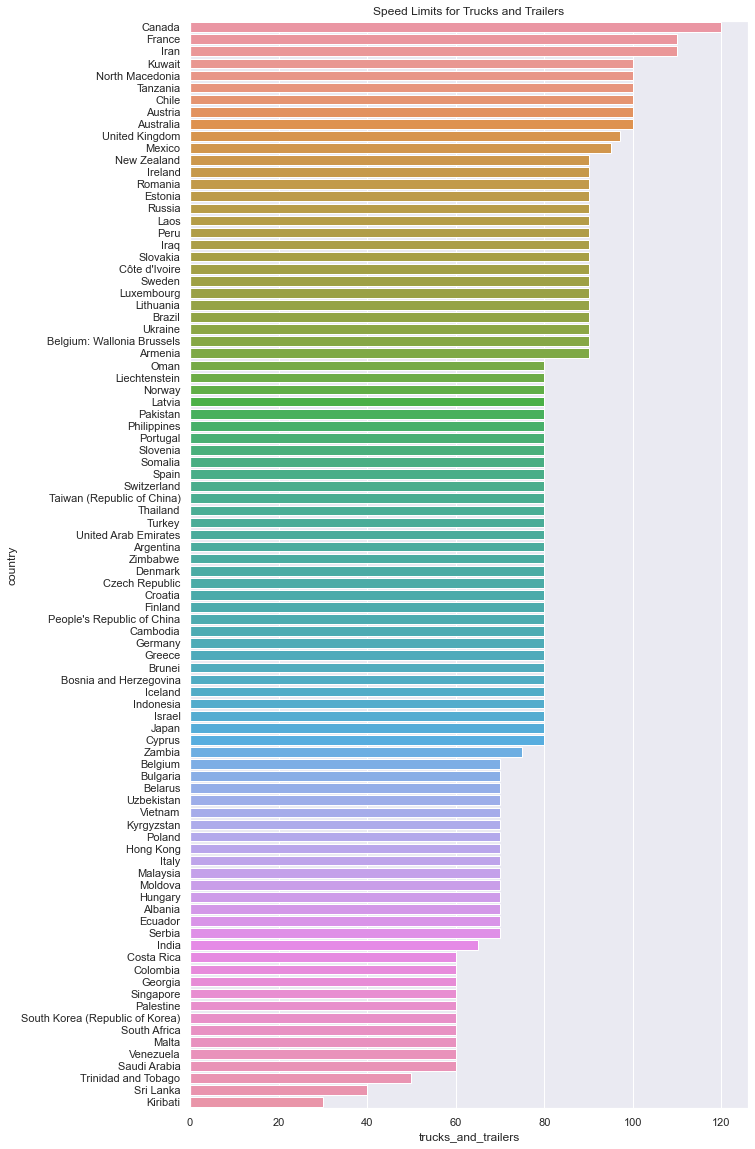

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))

vis_col = "trucks_and_trailers"

sns.barplot(
    y="country",
    x=vis_col,
    data=df_trucks.sort_values(by=vis_col, ascending=False).dropna(subset=[vis_col]),
    ax=ax
)

ax.set_title("Speed Limits for Trucks and Trailers")

Text(0.5, 1.0, 'Speed Limits for Trucks and Trailers outside Built-up Areas ')

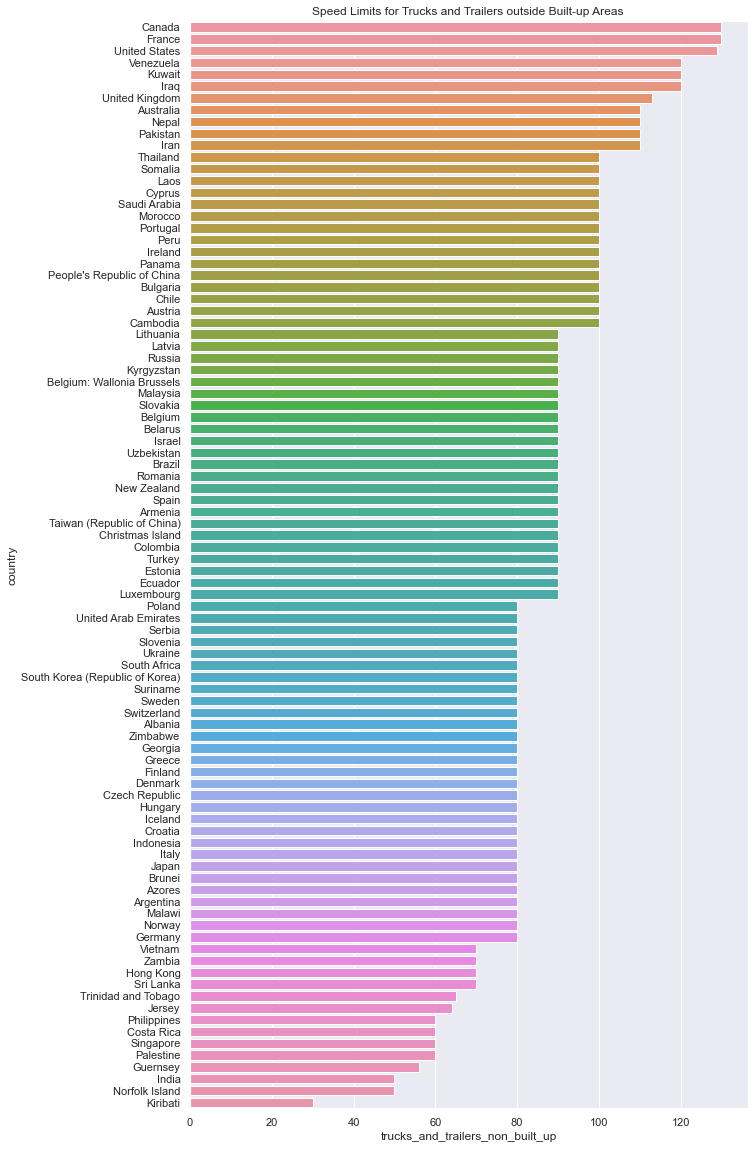

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))

vis_col = "trucks_and_trailers_non_built_up"

sns.barplot(
    y="country",
    x=vis_col,
    data=df_trucks.sort_values(by=vis_col, ascending=False).dropna(subset=[vis_col]),
    ax=ax
)

#Trucks, or automobiles with trailer, outside built-up areas/highways
ax.set_title("Speed Limits for Trucks and Trailers outside Built-up Areas ")